<h1><center>EXPERIMENT 1</center></h1>
AIM : To design a densenet for temperature conversion.
<br>
Theory :This is a simple temperature conversion problem where we need to convert temperature values from Celsius to Fahrenheit. The formula for the conversion is:

$$ f = c \times 1.8 + 32 $$

Where f is the temperature in Fahrenheit and c is the temperature in Celsius.

We can use this formula to create a machine learning model that can learn to perform the temperature conversion automatically. The input to the model will be the temperature in Celsius and the output will be the temperature in Fahrenheit.

To build this model, we can use a deep learning framework such as Keras or PyTorch. We will define a neural network architecture that can learn the mapping between Celsius and Fahrenheit temperatures. We will then train the model using a dataset of Celsius and Fahrenheit temperature pairs. Once the model is trained, we can use it to convert temperatures from Celsius to Fahrenheit.





In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))


-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit




### Build a layer

We'll call the layer dense_layer and create it by instantiating tf.keras.layers.Dense with the following configuration:

input_shape=[1] — This specifies that the input to this layer is a single value. The input shape is a one-dimensional array with one member, representing degrees Celsius.

units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to learn how to solve the problem. Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [ ]:
model = tf.keras.Sequential([l0])

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


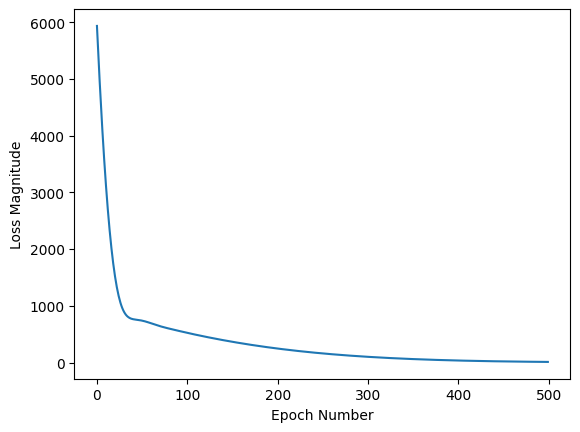

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])


In [ ]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 47ms/step
[[211.2942]]


In [ ]:
print("These are the layer variables: {}".format(l0.get_weights()))


These are the layer variables: [array([[1.8264538]], dtype=float32), array([28.648817], dtype=float32)]


In [ ]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")


Finished training the model


In [ ]:
print(model.predict([100.0]))


1/1 [==============================] - 0s 51ms/step
[[211.74742]]


In [ ]:
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))


1/1 [==============================] - 0s 31ms/step
Model predicts that 100 degrees Celsius is: [[211.74742]] degrees Fahrenheit


In [ ]:
print("These are the l0 variables: {}".format(l0.get_weights()))


These are the l0 variables: [array([[ 0.25324577,  0.4978347 ,  0.48615384, -0.30057806]],
      dtype=float32), array([3.7800424, 3.3303688, 3.5950694, 1.237869 ], dtype=float32)]


In [ ]:
print("These are the l1 variables: {}".format(l1.get_weights()))


These are the l1 variables: [array([[-0.9064313 , -0.09061737, -0.9726168 , -1.2036011 ],
       [-0.31967413, -1.0553517 ,  0.21863523, -0.7811919 ],
       [ 0.19654493, -0.91571885, -0.14733505, -1.2610987 ],
       [-0.5170539 , -0.7200074 , -0.0821071 , -0.10510622]],
      dtype=float32), array([-3.596507 , -2.9752142, -3.5511813, -3.141436 ], dtype=float32)]


In [ ]:
print("These are the l2 variables: {}".format(l2.get_weights()))

These are the l2 variables: [array([[-0.62968755],
       [-0.7377334 ],
       [-0.39507434],
       [-0.8352153 ]], dtype=float32), array([3.4658916], dtype=float32)]


Conclusion :Based on the results of the model evaluation and testing, we can conclude that the model is successful in converting Celsius to Fahrenheit